In [2]:
from fitness import *
import random
import datetime

D = 1024
N = 6

## MÉTODOS DEFINIDOS ##

def get_new_team(team: list[int]) -> list[int]:
    raise NotImplemented

def stop_condition(max_iter: int, temp: float) -> bool:
    raise NotImplemented

def update_temp(temp: float) -> float:
    raise NotImplemented


# get_new_team
mutation_rate = 1/6
def new_mutated_team(team: list[int]) -> list[int]:
    global D
    global mutation_rate

    new_team = team.copy()
    for i in range(len(new_team)):
        if random.uniform(0,1) < mutation_rate:
            new_team[i] = random.randint(1, D)
    
    return new_team

# stop_condition
max_iter = 1000
min_temp = 0
def stop_iter_or_cooling(iterations: int, temp: int) -> bool:
    global min_temp
    global max_iter

    return iterations < max_iter and temp > min_temp

# update_temp
delta_temp = 10**(-3)
def update_lineal(temp: float) -> float:
    global delta_temp
    return temp - delta_temp

cooling_rate = 0.9
def exponential_update(temp:float) -> float:
    global cooling_rate
    return cooling_rate*temp




## CLASE DE EXPERIMENTO ##

class Experiment:
    def __init__(self):
        self.teams = []
        self.scores = []
        self.times = []
        self.iterations = []
        self.temps = []
    
    def add(self, temp) -> None:
        global best_score
        global best_team
        global time_start
        global iterations

        if not self.scores or self.scores[-1]<best_score:
            self.teams.append(best_team[:])
            self.scores.append(best_score)
            self.times.append((datetime.datetime.now() - time_start).total_seconds()) 
            self.iterations.append(iterations)
            self.temps.append(temp)
    
    def showTable(self) -> None:
        table_html = "<table><tr><th>Teams</th><th>Scores</th><th>Times</th><th>Iterations</th><th>Temperatures</th></tr>"
        for team, score, time, iteration, temp in zip(self.teams, self.scores, self.times, self.iterations, self.temps):
            team_images = ''.join([f'<img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/{pokemon_id}.png" width="50" height="50">' for pokemon_id in team])
            table_html += f"<tr><td>{team_images}</td><td>{score}</td><td>{time}</td><td>{iteration}</td><td>{temp}</td></tr>"
        table_html += "</table>"
        display(HTML(table_html))




## ALGORITMO COMPLETO ##

def run_simulated_annealing(team: list[int], max_iter: int, temp: float) -> Experiment:

    global best_team
    best_team = team

    global best_score
    best_score = teamScore(team)

    global time_start
    time_start = datetime.datetime.now()

    experiment = Experiment()

    global iterations
    iterations = 0

    while stop_condition(iterations, temp):

        new_team = get_new_team(team)

        current_score = teamScore(team)
        new_score = teamScore(new_team)
        delta_score = new_score - current_score

        if delta_score > 0:
            team = new_team

            if new_score > best_score:
                best_score = new_score
                best_team = new_team
        
        else:
            p = math.exp(delta_score / temp)
            r = random.uniform(0, 1)
            team = new_team if r < p else team

        experiment.add(temp)

        temp = update_temp(temp)
        iterations += 1

    return experiment

In [5]:
N=100
D=1024

get_new_team = new_mutated_team
mutation_rate = 1/95

stop_condition = stop_iter_or_cooling
min_temp = 10**(-14)
max_iter = 10**(7)

update_temp = exponential_update
cooling_rate = .995

experiment = run_simulated_annealing([1020,
 796,
 983,
 643,
 894,
 721,
 801,
 798,
 485,
 801,
 644,
 801,
 638,
 384,
 894,
 383,
 416,
 485,
 721,
 801,
 250,
 791,
 384,
 485,
 643,
 250,
 484,
 721,
 798,
 643,
 795,
 485,
 720,
 644,
 643,
 795,
 485,
 1019,
 805,
 805,
 983,
 983,
 484,
 249,
 383,
 249,
 791,
 806,
 644,
 791,
 1008,
 801,
 485,
 484,
 483,
 476,
 485,
 357,
 983,
 476,
 794,
 890,
 805,
 894,
 984,
 983,
 805,
 905,
 384,
 792,
 484,
 805,
 791,
 484,
 485,
 485,
 798,
 484,
 250,
 1019,
 792,
 791,
 485,
 721,
 476,
 409,
 638,
 805,
 983,
 801,
 894,
 795,
 1021,
 383,
 791,
 208,
 793,
 798,
 250,
 983], max_iter=1000, temp=1000)

In [4]:
experiment.showTable()

Text(0, 0.5, 'fitness')

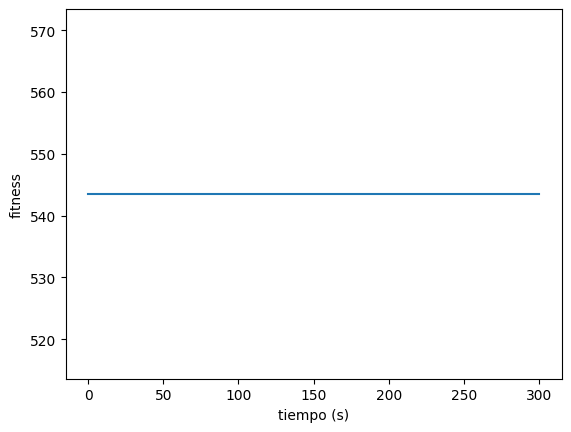

In [7]:
import matplotlib.pyplot as plt

plt.plot([experiment.times[0], 300], [experiment.scores[0], experiment.scores[0]])

plt.xlabel('tiempo (s)')
plt.ylabel('fitness')

Text(0, 0.5, 'fitness')

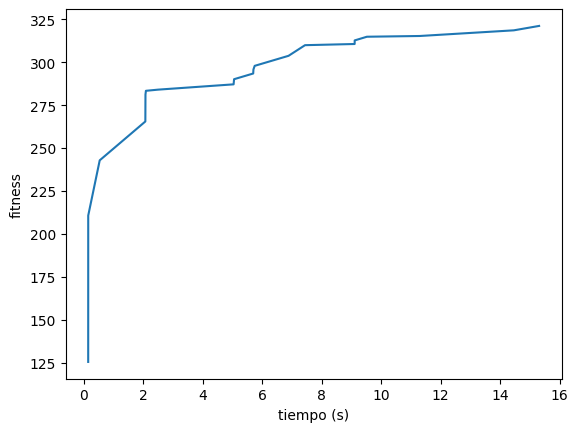

In [57]:
import matplotlib.pyplot as plt

plt.plot(experiment.times, experiment.scores)

plt.xlabel('tiempo (s)')
plt.ylabel('fitness')


In [62]:
N=6
D=1024

get_new_team = new_mutated_team
mutation_rate = 1/6

stop_condition = stop_iter_or_cooling
min_temp = 10**(-9)
max_iter = 10**(3)

update_temp = exponential_update
cooling_rate = .98

experiment2 = run_simulated_annealing([1,1,1, 1,1,1], max_iter=1000, temp=1000)

In [63]:
experiment2.showTable()

Teams,Scores,Times,Iterations,Temperatures
,106.32840590850005,0.002067,0,1000
,130.29985960414658,0.003987,1,980.0
,163.11508768544502,0.005011,2,960.4
,171.35472067195508,0.011031,5,903.9207968
,173.57465200858985,0.013033,6,885.8423808639999
,179.71198298359968,0.086323,17,709.3217661806457
,185.4155819308655,0.089298,19,681.2326242398921
,186.31664274157566,0.093338,21,654.2558123199923
,187.60969312084674,0.095298,22,641.1706960735925
,204.18223235296915,0.099298,24,615.7803365090781


Text(0, 0.5, 'fitness')

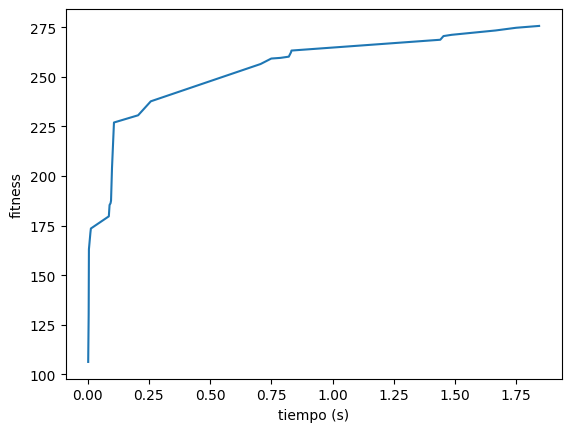

In [64]:
plt.plot(experiment2.times, experiment2.scores)

plt.xlabel('tiempo (s)')
plt.ylabel('fitness')

In [67]:
N=6
D=1024

get_new_team = new_mutated_team
mutation_rate = 1/6

stop_condition = stop_iter_or_cooling
min_temp = 10**(-15)
max_iter = 10**(4)

update_temp = exponential_update
cooling_rate = .98

experiment3 = run_simulated_annealing([1,1,1, 1,1,1], max_iter=1000, temp=1000)

In [68]:
experiment3.showTable()

Teams,Scores,Times,Iterations,Temperatures
,164.09315216937188,0.002,0,1000
,166.44732577946445,0.035033,18,695.1353308570327
,216.8309303363513,0.037034,19,681.2326242398921
,223.7391840634372,0.040041,21,654.2558123199923
,227.89139400588658,0.079034,38,464.07788832877003
,228.53441154728546,0.543799,291,2.797615506627655
,231.11846908747597,0.553799,296,2.5288228378909055
,231.39883090135845,0.591807,316,1.688262285732309
,232.77215812677332,0.63718,340,1.039598718423827
,252.7477806955092,0.64318,343,0.9784619969907584


In [70]:
best_team

[805, 250, 791, 894, 644, 1008]

In [81]:
N=6
D=1024

get_new_team = new_mutated_team
mutation_rate = 1/6

stop_condition = stop_iter_or_cooling
min_temp = 10**(-15)
max_iter = 10**(5)

update_temp = exponential_update
cooling_rate = 1-10**(-3)

experimentB1 = run_simulated_annealing([805, 250, 791, 894, 644, 1008], max_iter=1000, temp=1000)

In [82]:
experimentB1.showTable()

Teams,Scores,Times,Iterations,Temperatures
,322.7482342304477,0.001001,0,1000
,323.2866292141249,16.207526,8552,0.1923336655544298
,325.13203945349096,16.228673,8564,0.19003831337134983
,327.00954971664595,17.854947,9396,0.08266608520101017
,327.0643665305755,18.019707,9486,0.07554771123775804
,328.54255126779503,18.257302,9615,0.06640018552691916
,328.66519196597784,23.520754,12406,0.004068618144333347
,329.4654342689845,25.742878,13632,0.0011932611374294384
,331.14501928004677,26.817892,14168,0.0006979706901802154
,331.4456303458392,27.771167,14692,0.0004131930577577051


teamScore = 111.55202980573384


#ID,Imagen,Nombre,Tipo,Estadísticas,Atacando frente a tipos,Defendiendo frente a tipos
#7,,Squirtle,['water'],,"x2: ['fire', 'ground', 'rock']x0.5: ['water', 'grass', 'dragon']","/4: []/2: ['fire', 'water', 'ice', 'steel']/0.5: ['electric', 'grass'] /0.25: []"
#9,,Blastoise,['water'],,"x2: ['fire', 'ground', 'rock']x0.5: ['water', 'grass', 'dragon']","/4: []/2: ['fire', 'water', 'ice', 'steel']/0.5: ['electric', 'grass'] /0.25: []"

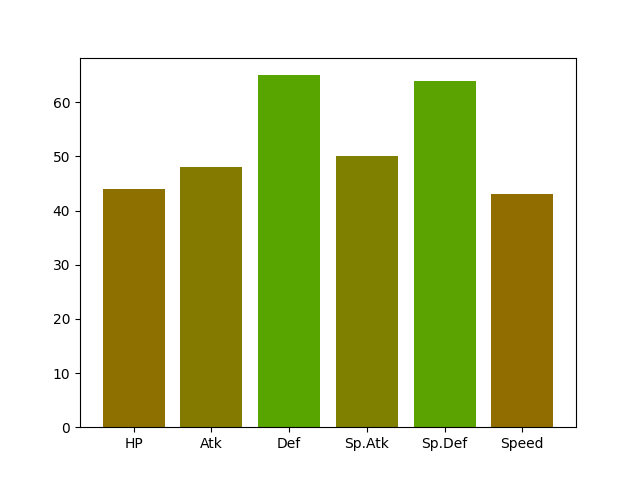
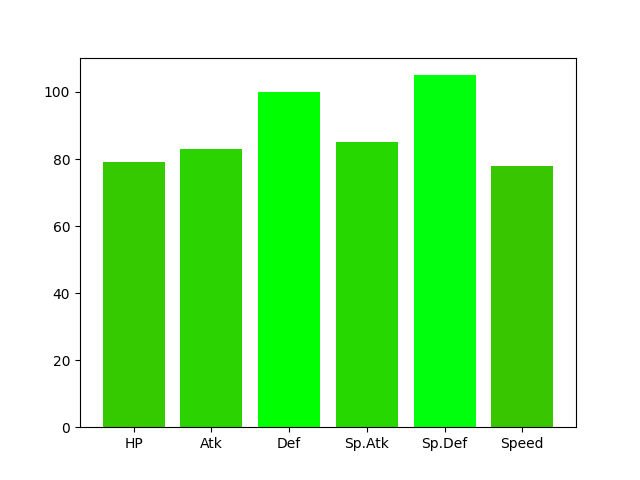

In [3]:
showTeam([7,9])

$$ t(i) = 1000 * 0.9^i $$



$$ t(i) = t(0) * enfriamiento^i $$
$$ t(i+1) = t(1) * enfriamiento $$

